# Import bibliotek

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import librosa

from IPython.display import Audio

# Wczytanie danych

In [2]:
df = pd.read_csv("../data/datasets_sum.csv")
df

,Emotion,Path,Dataset
0,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Crema
1,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Crema
2,NEUTRAL,../data/kaggle/input/speech-emotion-recognitio...,Crema
3,NEUTRAL,../data/kaggle/input/speech-emotion-recognitio...,Crema
4,DISGUST,../data/kaggle/input/speech-emotion-recognitio...,Crema
...,...,...,...
9390,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess
9391,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess
9392,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess
9393,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess


In [13]:
%%time
audio_arrays = []
sampling_rates = []

for path in df["Path"]:
    y, sr = librosa.load(path, sr=44100)
    audio_arrays.append(y)
    sampling_rates.append(sr)
    
df["Audio_array"] = audio_arrays
df["Sampling_rate"] = sampling_rates
df.head()

CPU times: user 7.1 s, sys: 1.42 s, total: 8.52 s
Wall time: 15.6 s


,Emotion,Path,Dataset,Audio_array,Sampling_rate
0,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Crema,"[0.00022397174, -9.429426e-05, -0.0007466104, ...",44100
1,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Crema,"[0.000112782494, 0.00013394406, 0.00010201089,...",44100
2,NEUTRAL,../data/kaggle/input/speech-emotion-recognitio...,Crema,"[0.0022768811, 0.0030965768, 0.0031128167, 0.0...",44100
3,NEUTRAL,../data/kaggle/input/speech-emotion-recognitio...,Crema,"[-0.002233105, -0.00264515, -0.00222969, -0.00...",44100
4,DISGUST,../data/kaggle/input/speech-emotion-recognitio...,Crema,"[-0.004840348, -0.0061861426, -0.0059352717, -...",44100


In [15]:
example = df.iloc[0, :]
example_audio_array = example["Audio_array"]
example_sampling_rate = example["Sampling_rate"]
example_dataset = example["Dataset"]
exampl_path = example["Path"]
example_emotion = example["Emotion"]

In [18]:
print(f"Example audio array\nEmotion: {example_emotion}\nDataset: {example_dataset}\nLength of audio array: {len(example_audio_array)}\nSampling rate: {example_sampling_rate}\nLength of audio: {len(example_audio_array)/example_sampling_rate:.2f}s")

Example audio array
Emotion: ANGRY
Dataset: Crema
Length of audio array: 107417
Sampling rate: 44100
Length of audio: 2.44s


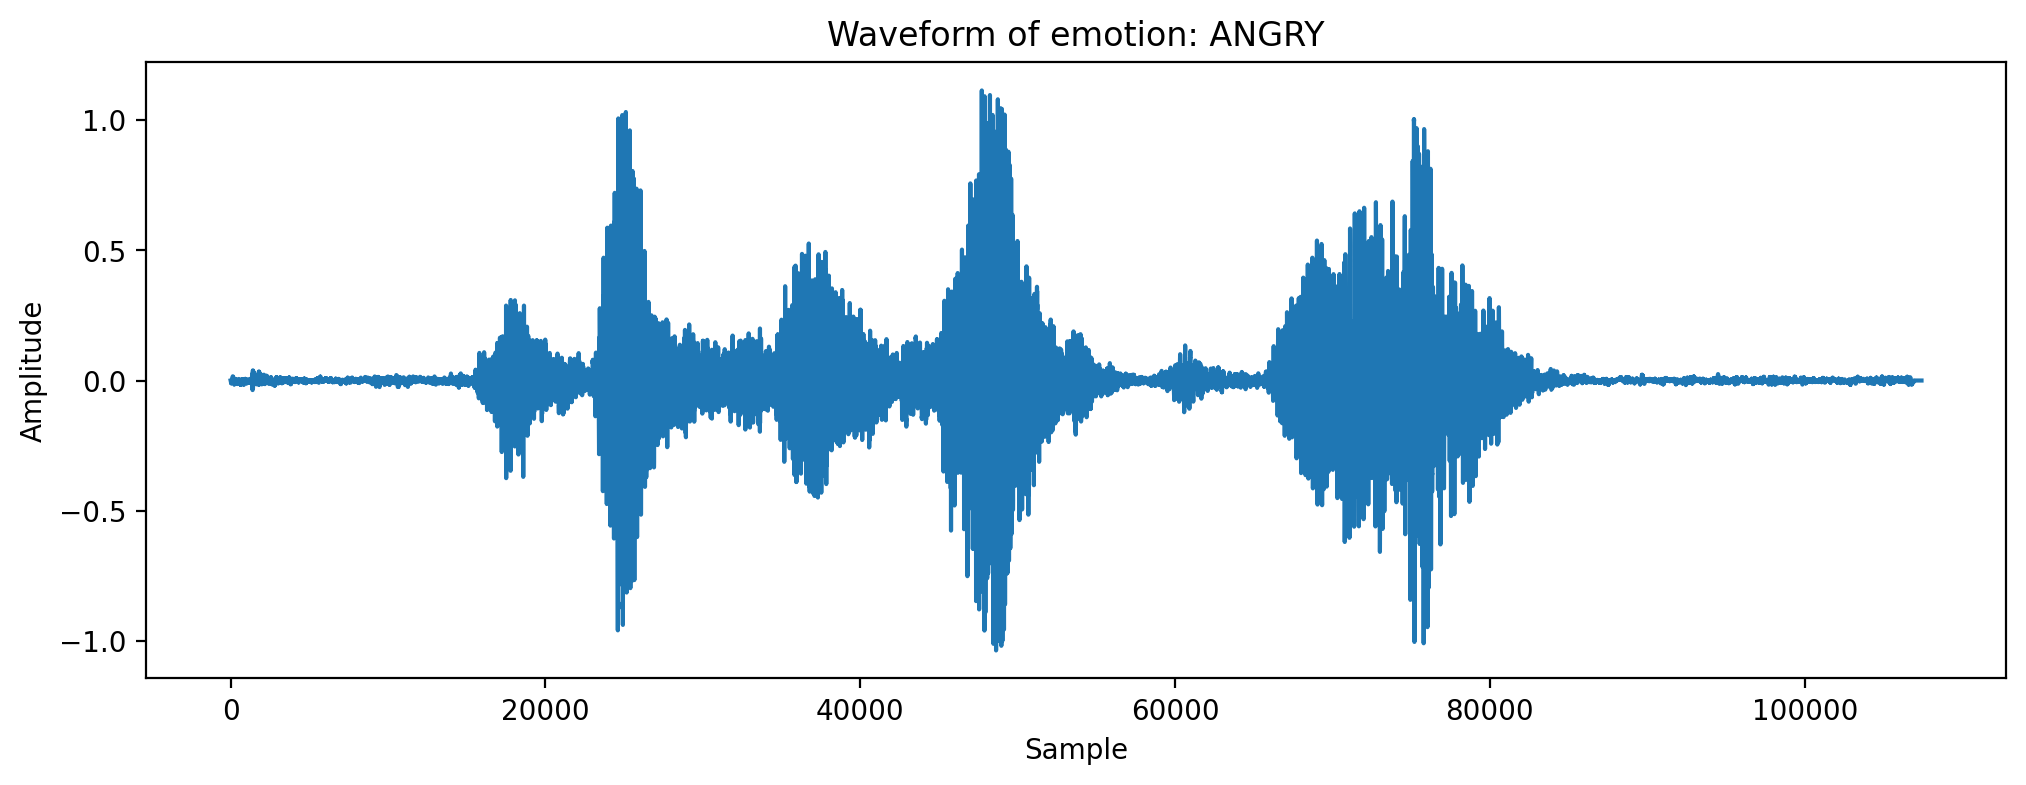

In [23]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(example_audio_array)
plt.title(f"Waveform of emotion: {example_emotion}")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

Audio(example_audio_array, rate=sr)